# Autores

**Helena Ferrero Chaves**

**María Pecker Gayarre**

# Motivación

El valor real de los datos recolectados en bruto solo puede ser comprendido una vez transformados en información.

Así, para garantizar la eficiencia logística de los sistemas de transporte y dar un mejor servicio al usuario es necesario recolectar, tratar y procesar una gran cantidad de datos, con el objetivo de transformar estos datos en información relevante.
Y en dicha transformación, la estadística es de gran importancia para el buen 
funcionamiento del sistema de transporte de una ciudad.

Después, esa información puede ser utilizada para mejorar la eficiencia de los procesos, la oferta al cliente y, en general, para tomar mejores decisiones de negocio.


# Objetivos

El objetivo general de este trabajo es demostrar el potencial que tienen las nuevas tecnologías, el "Big Data" y el análisis de datos para dar respuesta a los problemas que surgen dentro del ámbito de la movilidad urbana y mejorar la eficiencia de los sistemas de transporte dentro de las ciudades.

Se pretende abordar este objetivo mediante la elaboración de un caso práctico con datos reales del sistema BiciMAD.

# Dataset

**BiciMAD. Datos de los itinerarios de las bicicletas eléctricas**

*Web*: https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=d67921bb86e64610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default

**Periodo de los datos**: entre abril de 2017 y marzo de 2018

Datos de uso de Abril de 2017
https://opendata.emtmadrid.es/getattachment/8bb73c41-eab0-4e6a-ac92-80c8c68aacc2/201704_Usage_Bicimad.aspx

Datos de uso de Mayo de 2017
https://opendata.emtmadrid.es/getattachment/11054216-35d1-4003-b76b-8421c4a46eb4/201705_Usage_Bicimad.aspx

Datos de uso de Junio de 2017
https://opendata.emtmadrid.es/getattachment/c3a71f16-490a-42f9-b02e-384e08ceac2a/201706_Usage_Bicimad.aspx

Datos de uso de Julio de 2017
https://opendata.emtmadrid.es/getattachment/360dcfb0-78a2-49ae-8454-49e97530c1e4/201707_Usage_Bicimad.aspx

Datos de uso de Agosto de 2017
https://opendata.emtmadrid.es/getattachment/90cba892-9dc8-4120-b3e1-ca99d783bb5d/201708_Usage_Bicimad.aspx

Datos de uso de Septiembre de 2017
https://opendata.emtmadrid.es/getattachment/4ec0d958-b441-4da0-8730-b9b5d763cdf9/201709_Usage_Bicimad.aspx

Datos de uso de Octubre de 2017
https://opendata.emtmadrid.es/getattachment/b237a0fc-2785-4930-8fa2-11225d839ff9/201710_Usage_Bicimad.aspx

Datos de uso de Noviembre de 2017
https://opendata.emtmadrid.es/getattachment/dfb84318-8479-4bf1-93a8-957e7f7951e5/201711_Usage_Bicimad.aspx

Datos de uso de Diciembre de 2017
https://opendata.emtmadrid.es/getattachment/b3df7d48-90a7-4817-a800-e84e5bfd3118/201712_Usage_Bicimad.aspx

Datos de uso de Enero de 2018
https://opendata.emtmadrid.es/getattachment/4a6fa0af-d067-4d1a-84f4-a65fc4579640/201801_Usage_Bicimad.aspx

Datos de uso de Febrero de 2018
https://opendata.emtmadrid.es/getattachment/830d666c-62ad-4378-b3a8-2a47ea62e8f2/201802_Usage_Bicimad.aspx

Datos de uso de Marzo de 2018
https://opendata.emtmadrid.es/getattachment/f27d2161-32d2-4bfb-9918-15a2222174fe/201803_Usage_Bicimad.aspx

**Estructura datos**: 
https://datos.madrid.es/FWProjects/egob/Catalogo/Transporte/Bici/Ficheros/Servicios-y-estructuras-Bicimad-V1-1.pdf

# Planteamiento

En base a los datos que se manejan, se plantean las siguientes estadísticas agrupadas por categorías.

*   Uso de bicicletas por edad
*   Tiempo de uso de bicicletas por mes
*   Estaciones con mayor uso de bicicletas





# Implementación

## Preparar el entorno de ejecución en Colaboraty

Instalar la librería findspark

In [ ]:
!pip install -q findspark

Instalar pyspark

In [ ]:
!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Montar cuenta de Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Estadísticas

###Funciones

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import month, year, round, sum, col, countDistinct
import matplotlib.pyplot as plt

def anadir_datos(df, rutaFich):
    df1 = spark.read.json(rutaFich)
    df_union = df.union(df1)
    return df_union

def anadir_mes(df):
    # Añadir columna 'month' y eliminar la columna 'unplug_hourTime'
    df_ampliado = df.withColumn("month", month(df.unplug_hourTime.getItem("$date")))\
            .drop('unplug_hourTime')
    return df_ampliado

# Uso de bicicletas por edad
def crear_estadistica_1(df, axes):
    # Gráfica 1
    df_est = df.groupBy('ageRange').count().sort('ageRange')
    dfp = df_est.toPandas().dropna()
    dfp['ageRange'] = dfp['ageRange'].replace([0,1,2,3,4,5,6], ['Rango indeterminado', 'Entre 0 y 16 años', 'Entre 17 y 18 años', 'Entre 19 y 26 años', 'Entre 27 y 40 años', 'Entre 41 y 65 años', 'Entre 66 años o más'])

    ax = axes[0][0]
    dfp.plot.barh(
        ax=ax,
        legend=None,
        x = "ageRange", 
        title = f"Uso de bicicletas por edad",
        xlabel="Cantidad de usuarios",
        ylabel="Rangos de edad",
        rot=0
        )
    ax.bar_label(ax.containers[0])

    # Gráfica 2
    df1 = df.toPandas()
    df1['ageRange'] = df1['ageRange'].replace([0,1,2,3,4,5,6], ['Rango indeterminado', 'Entre 0 y 16 años', 'Entre 17 y 18 años', 'Entre 19 y 26 años', 'Entre 27 y 40 años', 'Entre 41 y 65 años', 'Entre 66 años o más'])
    dfp = df1.groupby('ageRange').count().dropna()

    ax = axes[0][1]
    dfp.plot(kind='pie', y='_id', ylabel="", ax=ax, legend=None, autopct='%.2f%%', title = f"Uso de bicicletas por edad")

# Tiempo de uso de bicicletas por mes
def crear_estadistica_2(df, axes):
    # Gráfica 1
    df_est = df.groupby('month').agg(round(sum('travel_time') / 3600, 0).alias('tiempo en horas')).sort('month').dropna()
    dfp = df_est.toPandas().dropna()
    dfp['month'] = dfp['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'])

    ax = axes[1][0]
    dfp.plot.bar(
            ax=ax,
            legend=None,
            x = "month", 
            title = f"Tiempo de uso de bicicletas por mes",
            xlabel="Meses",
            ylabel="Tiempo en horas",
            rot=60
        )
    ax.bar_label(ax.containers[0])

    # Gráfica 2
    ax = axes[1][1]
    dfp.plot.line(
            ax=ax,
            legend=None,
            x = "month", 
            title = f"Tiempo de uso de bicicletas por mes",
            xlabel="Meses",
            ylabel="Tiempo en horas",
            rot=60
        )

# Estaciones con mayor uso de bicicletas
def crear_estadistica_3(df, axes):
    # Gráfica 1
    df_est = df.groupBy('idunplug_station').count().sort(col("count").desc()).dropna()
    dfp = df_est.toPandas().head(10)
    
    ax = axes[2][0]
    dfp.plot.bar(
            ax=ax,
            legend=None,
            x = "idunplug_station", 
            title = f"Estaciones con mayor uso de bicicletas",
            xlabel="Nº Estación",
            ylabel="Usos",
            rot=0
        )
    ax.bar_label(ax.containers[0])

    # Gráfica 2
    df1 = df.toPandas()
    dfp = df1.groupby('idunplug_station').count().dropna().head(8)

    ax = axes[2][1]
    dfp.plot(kind='pie', y='_id', ylabel="", ax=ax, legend=None, autopct='%.2f%%', title = f"Estaciones con mayor uso de bicicletas")

# Cantidad de usuarios por mes
def crear_estadistica_4(df, axes):
    # Gráfica 1
    df_est = df.groupBy('month').agg(countDistinct("user_day_code")).sort(col("month").asc()).dropna()
    dfp = df_est.toPandas()
    dfp['month'] = dfp['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'])

    ax = axes1[0][0]
    dfp.plot.bar(
            ax=ax,
            legend=None,
            x = "month", 
            title = f"Cantidad de usuarios por mes",
            xlabel="Meses",
            ylabel="Usuarios",
            rot=60
        )
    ax.bar_label(ax.containers[0])

    # Gráfica 2
    ax = axes1[0][1]
    dfp.plot.line(
            ax=ax,
            legend=None,
            x = "month", 
            title = f"Cantidad de usuarios por mes",
            xlabel="Meses",
            ylabel="Usuarios",
            rot=60
        )

# Cantidad de movimientos por mes
def crear_estadistica_5(df, axes):
    # Gráfica 1
    df_est = df.groupBy('month').count().sort(col("month").asc()).dropna()
    dfp = df_est.toPandas()
    dfp['month'] = dfp['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'])

    ax = axes1[1][0]
    dfp.plot.bar(
            ax=ax,
            legend=None,
            x = "month", 
            title = f"Cantidad de movimientos por mes",
            xlabel="Meses",
            ylabel="Movimientos",
            rot=60
        )
    ax.bar_label(ax.containers[0])

    # Gráfica 2
    ax = axes1[1][1]
    dfp.plot.line(
            ax=ax,
            legend=None,
            x = "month", 
            title = f"Cantidad de movimientos por mes",
            xlabel="Meses",
            ylabel="Movimientos",
            rot=60
        )

def mostrar_estadisticas(fig):
    fig.suptitle('De abril 2017 hasta marzo 2018') 
    fig.tight_layout() # separador de gráficos entre columnas y filas
    fig.axes

    fig1.suptitle('De abril 2017 hasta marzo 2018') 
    fig1.tight_layout()
    fig1.axes

    plt.show()

### Main

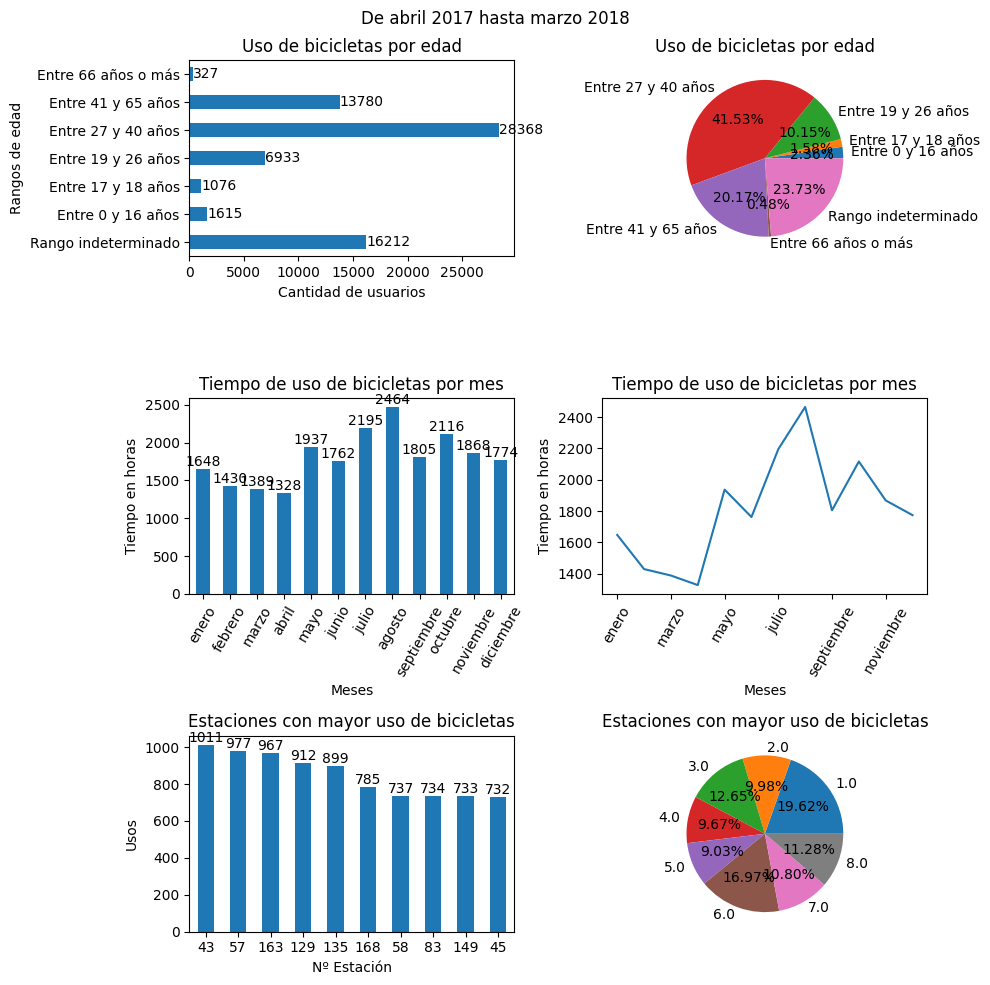

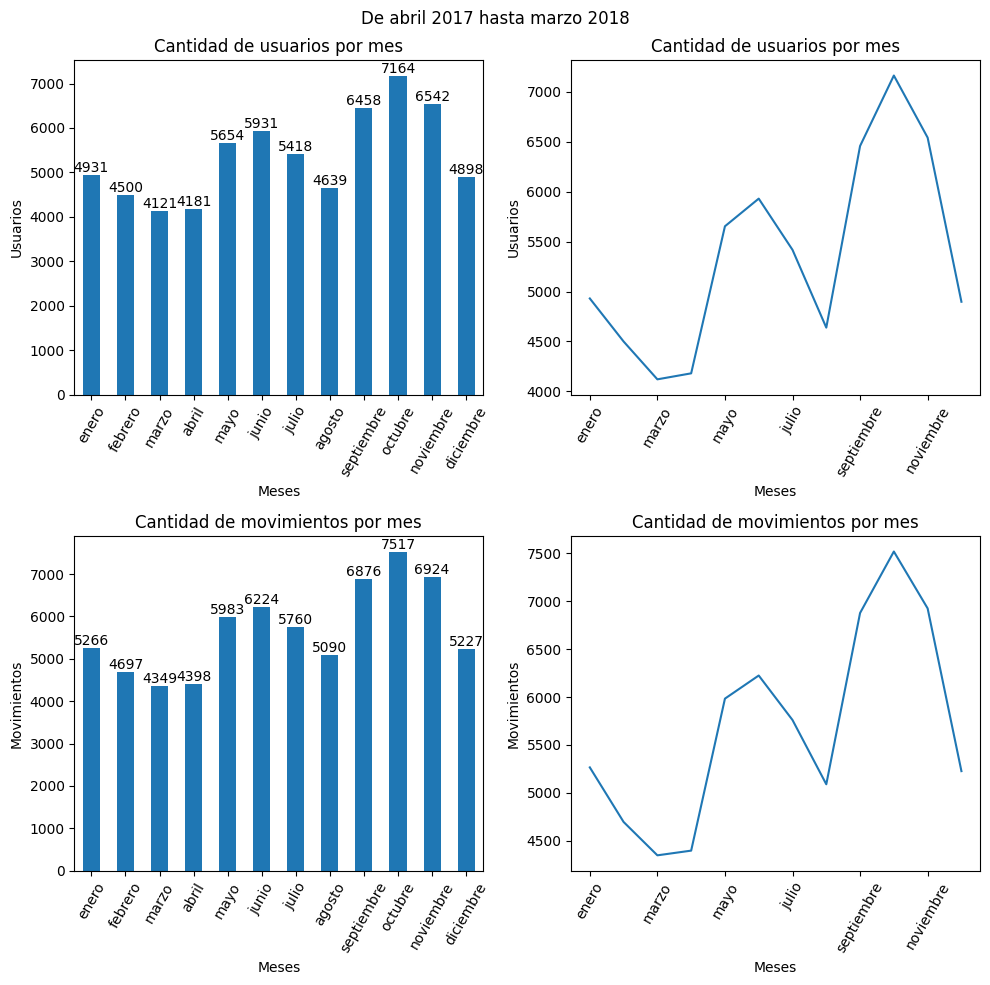

In [ ]:
if __name__ == "__main__":
    # Configuraciones iniciales
    spark = SparkSession.builder.master('local[*]').config("spark.driver.memory", "15g").getOrCreate()
    fig, axes = plt.subplots(nrows = 3, ncols = 2, squeeze = False, figsize = (10,10)) 
    fig1, axes1 = plt.subplots(nrows = 2, ncols = 2, squeeze = False, figsize = (10,10)) 

    # Crear dataframe con los datos con esquema 1 (con columnas: "_corrupt_record","track")
    df1 = spark.read.json('./drive/MyDrive/Colaboratory/bicimad2/data/201704_Usage_Bicimad.json')
    df1 = anadir_datos(df1, './drive/MyDrive/Colaboratory/bicimad2/data/201705_Usage_Bicimad.json')
    df1 = anadir_datos(df1, './drive/MyDrive/Colaboratory/bicimad2/data/201706_Usage_Bicimad.json')
    df1 = anadir_datos(df1, './drive/MyDrive/Colaboratory/bicimad2/data/201707_Usage_Bicimad.json')
    df1 = anadir_datos(df1, './drive/MyDrive/Colaboratory/bicimad2/data/201708_Usage_Bicimad.json')
    df1 = anadir_datos(df1, './drive/MyDrive/Colaboratory/bicimad2/data/201709_Usage_Bicimad.json')
    df1 = anadir_datos(df1, './drive/MyDrive/Colaboratory/bicimad2/data/201710_Usage_Bicimad.json')
    df = df1.drop("_corrupt_record","track")

    # Crear dataframe con los datos con esquema 2 (sin columnas: "_corrupt_record","track")
    df2 = spark.read.json('./drive/MyDrive/Colaboratory/bicimad2/data/201711_Usage_Bicimad.json')
    df2 = anadir_datos(df2, './drive/MyDrive/Colaboratory/bicimad2/data/201712_Usage_Bicimad.json')
    df2 = anadir_datos(df2, './drive/MyDrive/Colaboratory/bicimad2/data/201801_Usage_Bicimad.json')
    df2 = anadir_datos(df2, './drive/MyDrive/Colaboratory/bicimad2/data/201802_Usage_Bicimad.json')
    df2 = anadir_datos(df2, './drive/MyDrive/Colaboratory/bicimad2/data/201803_Usage_Bicimad.json')
    
    df = df.union(df2)

    df = anadir_mes(df)
    df_muestra = df.sample(0.02)
    df = df_muestra
    # Crear estadísticas
    crear_estadistica_1(df, axes)
    crear_estadistica_2(df, axes)
    crear_estadistica_3(df, axes)
    crear_estadistica_4(df, axes)
    crear_estadistica_5(df, axes)

    mostrar_estadisticas(fig)
